# ElectroCardioGraphy(ECG)
## Introduction

Electrocardiography is a process or a method which records electrical activity of the heart againt time 
ECG is composite from 5 waves - P, Q, R, S and T.Signals are measured from the ECG signal . 
The main peak of the jupyter notebook is as below




In [53]:
%%html 
<img src='QRSWave.png',width=10,height=10>

The steps for analysis of ECG are as belows

#### 1 . Signal Acquisition : 
The electrodes are placed on chest and limbs . The main function of these are to capture the difference in the
potential difference of the myocardial fibre [1].The raw signal acquired are amplified and converted to digital form .
This produces noise like power sample and breathing sample artifact [2].

#### 2. Digital signal processing with digital filters : 
The filters remove the noise from the signal through filtering techniques. There are many noise which are generated power line interference electrode pop or contact noise, patient–electrode motion artifacts, electromyographic (EMG) noise, baseline wandering[5]. 
The  main  noise  elements  are  power  supply  network  50  Hz  frequency  and  breathing  muscle movements.Digital filters 
like FIR or IIR filters are used to filter out the signal. After the basic filtering R peaks are detected . 
R peaks are necessary for heart rate detection[1].

#### 3. Heart Rate Detection Algorithm : 
Some heart rate algorithm are used to detect the rate on statistical  and differential  mathematical methods [1].
The QRS complex is the most striking waveform within the electrocardiogram (ECG).
There are many algorithms for QRS detection like Derivative based algorithm ,wavelet based algorithm to name a few [3].

#### 4. Application of designed algorithms : 
After finding the heart rate frequency we can use this to for many applications like stress test etc.

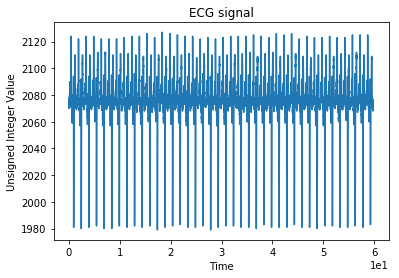

In [14]:
#In this we plot a the data of aami3a.dat file  
#import files
# Question 4
%matplotlib inline

#now we import different packages that will allow to do math, linear algebra, numerical operations, array operations and plotting
import scipy as Sci
import scipy.linalg
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
from scipy import signal
from __future__ import division
from matplotlib import gridspec

#open the file
File_Location_And_Name =open("aami3a.dat",'rb') #open aami3a.dat

All_signals = np.fromfile(File_Location_And_Name,dtype=np.uint16) #Read the file 
Length_Of_Signals = len(All_signals) # Find length
fs = 720. #given sampling rate
Ts = 1/fs #formula for Time period
File_arrange = np.arange(0,Length_Of_Signals/fs,Ts) #arrange according to step size


plt.plot(File_arrange,All_signals) #plot the signal
plt.title('ECG signal')
plt.xlabel('Time')
plt.ylabel('Unsigned Integer Value')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))



**Question 5** <br/>
Suppose a person has 90 heart beats per minute then we need to plot samples for 90/60(1.5 beats per sec ) and 
signal delay/acquisition of .5 sec (for example) so the total time taken is (1.5 * 5 +.5) = 8 secs. The number of samples taken per sec is the sampling Rate 
 Fs = N/Time in seconds 
 where N is the no of samples ,Fs is the sampling frequency 
N = Fs*(No of seconds)
N = 720*8 = 5760

Calculating for 60 beats per min
 N = 720*5 =3600
 but in the figure below when we take 3600 sample we get only 4 beats, this is because of a delay in the signal due to factors
 like signal acquisition , noise etc
 So to find 5 beats we compute for 6 and 7 seconds (the 7 second one shows 5 beats per second) 
 720*7 = 5250 Threrefore no of samples are given by 5250
The below figures shows the both the plots with 5 seconds and 7 seconds

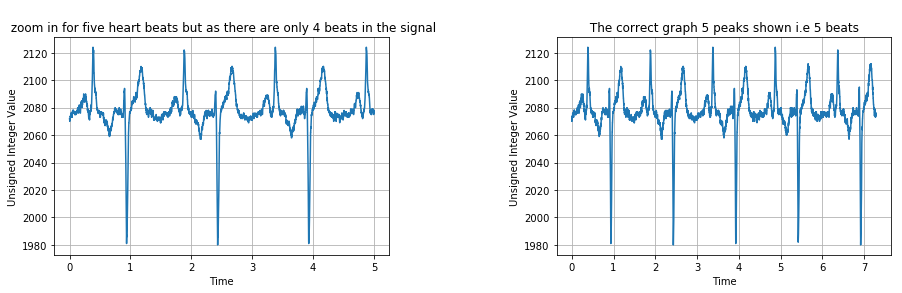

In [15]:
# Question No 6
fig=plt.figure() #As we have multiple plots we use figure to define the plot
fig.set_size_inches((15,10)) 
gs = gridspec.GridSpec(2,2) #Gridspec is used to define how many grids are expected like 1,2 etc
gs.update( wspace=0.5, hspace=0.5) #Spacing of the grids
# We take no of samples as 3600 (720*5) as we are finding out for 5 secs (only 4 beats are visible)
No_Of_Samples = 3600 
#for plotting we first arrange the following
Array_List_For_ZoomIn = np.arange(0,No_Of_Samples/fs,1/fs)
Plot_Sample = fig.add_subplot(plt.subplot(gs[0,0]))
Plot_Sample.plot(Array_List_For_ZoomIn,All_signals[:No_Of_Samples])
Plot_Sample.set_title('\n zoom in for five heart beats but as there are only 4 beats in the signal')
Plot_Sample.set_xlabel('Time')
Plot_Sample.set_ylabel('Unsigned Integer Value')
Plot_Sample.grid()
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
# We take no of samples as 5250 (720*7) as we are finding out for 7 secs (now we can see 5 beats are visible)
No_Of_Samples_Correct = 5250  
Array_List_For_ZoomIn_R = np.arange(0,No_Of_Samples_Correct/fs,1/fs) # implementing the above steps for different no of samples
Plot_Sam = fig.add_subplot(plt.subplot(gs[0,1]))
Plot_Sam.plot(Array_List_For_ZoomIn_R,All_signals[:No_Of_Samples_Correct])
Plot_Sam.set_title('\n The correct graph 5 peaks shown i.e 5 beats ')
Plot_Sam.set_xlabel('Time')
Plot_Sam.set_ylabel('Unsigned Integer Value')
Plot_Sam.grid()
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))


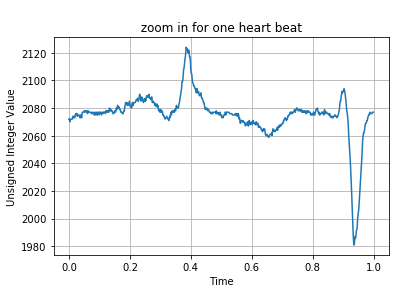

In [16]:
#We now plot the graph or zoom in for one heart beat (or one peak)

Array_List_For_One_Heart_Beat = np.arange(0,1,1/fs)
plt.plot(Array_List_For_One_Heart_Beat,All_signals[:720])
plt.title('\n zoom in for one heart beat ')
plt.xlabel('Time')
plt.ylabel('Unsigned Integer Value')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.grid()


**Question No 7** <br/>
The QRS peak is small so the individual has a low heart rate
This can also be found out by installing a package called biosppy
Biosppy is a package which is a toolbox for processing bio signals
This package has to be installed 
This can be done by the following steps <br/>
1.Open Anaconda prompt <br/>
2.type "pip install biosppy"  (This will directly install biosppy as pip is a pre installed package in python) 
3. If not installed the below line of code will give an error 

**From the below graph we can find that the beats per minute is 40**

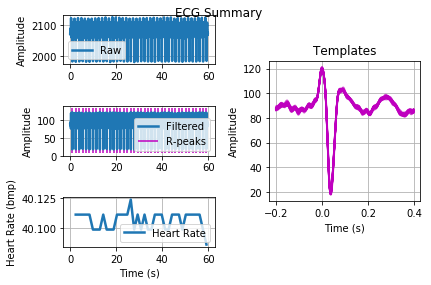

Total no of R peaks are  : 40
The heart rate per minute is :40.1185631761


In [17]:
#This is a package which computes filteration ,heart rate etc , but it needs installation
from biosppy.signals import ecg  
from biosppy import tools as st
from biosppy import plotting, utils
import biosppy
out = ecg.ecg(signal=All_signals,sampling_rate=fs,show=True)
#ECG R-peak segmentation algorithm.This uses approach by Christov [7] .
Rpeaks, = biosppy.signals.ecg.christov_segmenter(signal=All_signals,sampling_rate=fs)
print 'Total no of R peaks are  : ' + str(len(Rpeaks))

hr_idx, hr = st.get_heart_rate(beats=Rpeaks,sampling_rate=fs,smooth=True,size=3)
print 'The heart rate per minute is :' + str(np.mean(hr))

The maximum frequency is : 4.98176674504


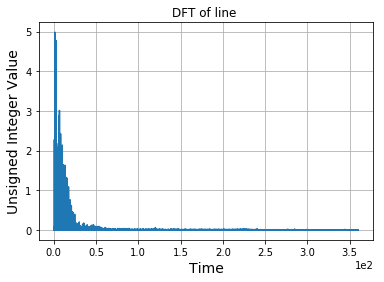

In [18]:
# Question no 9 and 10
#Obtaining the DFT and finding out the maximum frequency 
Remove_DC_Component = All_signals - np.mean(All_signals) #Removing DC component
FFT_Transform = np.fft.fft(Remove_DC_Component) #fast fourier transform
FFT_Transform = abs(FFT_Transform) #converts it into amplitude
FFT_Transform = FFT_Transform/len(Remove_DC_Component) #Finding Amplitude of the signal and normalizing
Frequency_Plotting = np.arange(0,fs/2,fs/Length_Of_Signals) # defining the range 

plt.subplot(111)
# As the signal after fft is the mirror across the sample we take only half of the signal wave
plt.plot(Frequency_Plotting,FFT_Transform[:21541]) 
plt.grid()
plt.title('DFT of line ')
plt.xlabel('Time',fontsize=14)
plt.ylabel('Unsigned Integer Value',fontsize=14)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
#maximum frequency 
Frequency =  np.amax(FFT_Transform[:21541])
FrequencyValue = str(Frequency)
print "The maximum frequency is : " + FrequencyValue




**Question 11 , 12 ,13** <br/>
Heart Rate <br/>
A average heart rate of the person is about 60 - 100 beats per min . A lower heart rate is called  bradycardia (Slow heart) and fast heart rate (rate more than average rate) is called  tachycardia (Fast heart) [5].
Heart Rate = beats per min or 60/(R-R interval)   .  

A filter is necessary in these signals as there are many noise such as power line interference, electrode pop or contact noise
patient–electrode motion artifacts and electromyographic (EMG) noise and baseline wandering to name a few.To remove that we use
filtering techniques like FIR and IIR filters .
The amplitude will be affected as every filter produces the -3db gain which affects the amplitude of the signal. The signal 
which has better filtering technique will lose more amplitude [6]. 
 
  


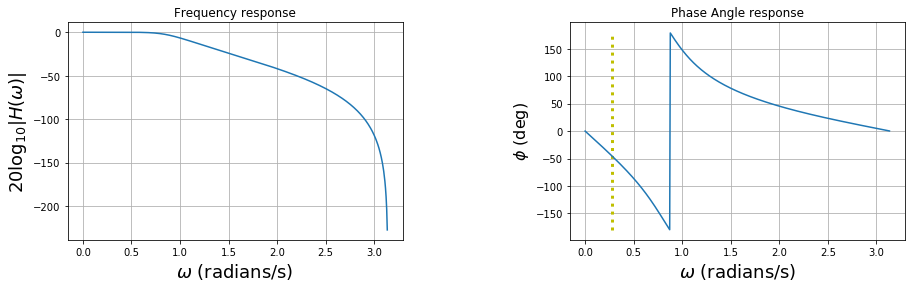

In [19]:
#Question 14 ,15
#Applying butterworth filter and obtaining the frequency transform
# Given Cutoff frequency = 100 hz
fig=plt.figure()
fig.set_size_inches((15,10))

gs = gridspec.GridSpec(2,2)
gs.update( wspace=0.5, hspace=0.5)

MaxFrequency=fs/2
cutoff= 100
#For digital filters, the cutoff frequencies must lie between 0 and 1, where 1 corresponds to the Nyquist rate
Wn=100/MaxFrequency # Reference [4] Wn is in half-cycles / sample so we find maxfrequency
b,a=signal.butter(4,Wn,btype='low',analog= False)
w,h=signal.freqz(b,a) # finding the impulse response of the filtered signal
Filter_Signal=signal.lfilter(b,a,Remove_DC_Component) #Filter data along one-dimension with an IIR or FIR filter.

#Plotting Frequency response
Initial_Fig = fig.add_subplot(plt.subplot(gs[0,0]))
Initial_Fig.plot(w, 20 * np.log10(abs(h)))
Initial_Fig.set_title('Frequency response')
Initial_Fig.set_ylabel(r"$ 20 \log_{10}|H(\omega)| $",fontsize=18)
Initial_Fig.set_xlabel(r'$\omega$ (radians/s)',fontsize=18)
Initial_Fig.grid()
#Angle Response
Phase_Response = fig.add_subplot(plt.subplot(gs[0,1]))
Phase_Response.plot(w,np.angle(h)/np.pi*180)
Phase_Response.set_title('Phase Angle response')
Phase_Response.set_xlabel(r'$\omega$ (radians/s)',fontsize=18)
Phase_Response.set_ylabel(r"$\phi $ (deg)",fontsize=16)
Phase_Response.vlines(Wn,-180,180,linestyles=':',color='y',lw=3.)
Phase_Response.grid()




Peak in DFT data is 4.9816013693
Maximum is observed at f=1.35501355014


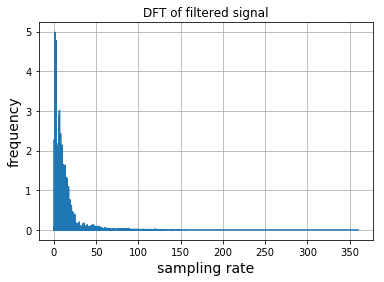

In [20]:
# Question No 16
#Obtaining the DFT of the filtered signal
fig=plt.figure()
fig.set_size_inches((15,10))
gs = gridspec.GridSpec(2,2)
gs.update( wspace=0.5, hspace=0.5)
#we are applying the basic fft techniques as applied above to find the Filtered Signal
Length_Of_Filtered_Signal=len(Filter_Signal)
FFT_Of_Filtered_Signal=np.fft.fft(Filter_Signal)
FFT_Of_Filtered_Signal=abs(FFT_Of_Filtered_Signal)/Length_Of_Filtered_Signal
Initial_Fig = fig.add_subplot(plt.subplot(gs[0,0]))
Initial_Fig.plot(Frequency_Plotting, FFT_Of_Filtered_Signal[:21541]) 
Initial_Fig.set_title('DFT of filtered signal')
Initial_Fig.set_ylabel("frequency",fontsize=14)
Initial_Fig.set_xlabel('sampling rate',fontsize=14)
Initial_Fig.grid()
p=np.amax(FFT_Of_Filtered_Signal[:21541]) 
print 'Peak in DFT data is ' +str(p)
#We round off the peak to two places decimal and then compute all the signals which are greater than 4.98 
L2=np.arange(21540)
for index in L2:
    if FFT_Of_Filtered_Signal[index]>=4.98:
        print 'Maximum is observed at f=' +str(index/59.04)  
        break 

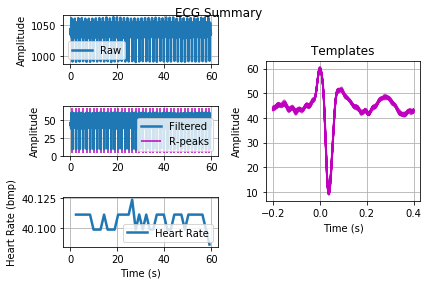

In [21]:
from biosppy.signals import ecg  #This is a package whcih computes filteration ,heart rate etc , but it needs installation
out = ecg.ecg(signal=All_signals/2,sampling_rate=fs,show=True)

**Question no 17**
<br/>
No the above signal will not have any affects on the interpretation of the heart rate as shown in the above figure .The heart
rate remains same for the filtered signal 



# Bibiliography
[1]ECG Signal Processing, Classification and Interpretation: A Comprehensive Framework of Computational Intelligence 
Adam Gacek Witold Pedrycz London : Springer-Verlag London Limited, 2012. Page no 1,2 <br/>
[2] ECG Signal Processing and Heart Rate Frequency Detection Methods, Conference Paper November 2011 
Conference: Technical Computing 2011,Prague , Jakub Parák, Jan Havlík <br/>
[3] The principles of software QRS detection - IEEE Engineering in Medicine and Biology Magazine Bert-Uwe Köhler, Carsten Hennig, Reinhold Orglmeister
Department of Electrical Engineering, Biomedical Electronics Group, Berlin University of Technology <br/>
[4] scipy docs :https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.signal.butter.html <br/>
[5] Study and Analysis of ECG Signal Using MATLAB & LABVIEW as Effective Tools M. K. Islam, A. N. M. M. Haque, G. Tangim, T. Ahammad, and M. R. H. Khondokar, 
Member, IACSIT, International Journal of Computer and Electrical Engineering, Vol. 4, No. 3, June 2012 <br/>
[6] QRS Detection Based on Multiscale Mathematical Morphology for Wearable ECG Devices in Body Area Networks
Fei Zhang and Yong Lian, Fellow, IEEE, IEEE TRANSACTIONS ON BIOMEDICAL CIRCUITS AND SYSTEMS, VOL. 3, NO. 4, AUGUST 2009 Pg  223,224 <br/>
[7] Ivaylo I. Christov, “Real time electrocardiogram QRS detection using combined adaptive threshold”, BioMedical Engineering OnLine 2004, vol. 3:28, 2004